In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict
import os
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from itertools import cycle


# Load CSV

In [2]:

X_train = pd.read_csv('./models_training_csv/train_minmax_pca.csv')
X_train = shuffle(X_train)
y_train = X_train.iloc[:,-1]
X_train = X_train.drop('class', axis=1)

X_test = pd.read_csv('./models_training_csv/test_minmax_pca.csv')
X_test = shuffle(X_test)
y_test = X_test.iloc[:,-1]
X_test = X_test.drop('class', axis=1)


In [2]:
# PCA 150
X_train_150 = pd.read_csv('./Ready_to_train/x_train_minmax_pca.csv')
X_train_150 = shuffle(X_train_150)
y_train_150 = X_train_150.iloc[:,-1]
X_train_150 = X_train_150.drop('class', axis=1)

X_test_150 = pd.read_csv('./Ready_to_train/x_test_minmax_pca.csv')
y_test_150 = X_test_150.iloc[:,-1]
X_test_150 = X_test_150.drop('class', axis=1)

#PCA 97
X_train_97 = pd.read_csv('./Ready_to_train/x_train_minmax_pca_97.csv')
X_train_97 = shuffle(X_train_97)
y_train_97 = X_train_97.iloc[:,-1]
X_train_97 = X_train_97.drop('class', axis=1)

X_test_97 = pd.read_csv('./Ready_to_train/x_test_minmax_pca_97.csv')
y_test_97 = X_test_97.iloc[:,-1]
X_test_97 = X_test_97.drop('class', axis=1)

# HOG
X_train_hog = pd.read_csv('./Ready_to_train/train_hog_before_norm.csv')
X_train_hog = shuffle(X_train_hog)
y_train_hog = X_train_hog.iloc[:,-1]
X_train_hog = X_train_hog.drop('class', axis=1)

X_test_hog = pd.read_csv('./Ready_to_train/test_hog_before_norm.csv')
y_test_hog = X_test_hog.iloc[:,-1]
X_test_hog = X_test_hog.drop('class', axis=1)

X_train_150 X_test_150 X_train_97 X_test_97 X_train_hog X_test_hog

----------
# Knn

In [37]:
model = KNeighborsClassifier(n_neighbors=19, weights = 'uniform', p = 2)
model.fit(X_train_150, y_train_150.values.ravel()) 
y_pred = model.predict(X_test_150)
score = accuracy_score(y_test_150,y_pred)
print(score)

0.6428571428571429


In [38]:
accuray_man = {}
accuray_uw = {}
accuray_man_u = {}
accuray_uu = {}

kVals = np.arange(1,100,1)
for k in kVals:

    # Manhattan Weighted Knn
    model = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 1)
    model.fit(X_train_97, y_train_97.values.ravel()) 
    y_pred = model.predict(X_test_97)
    score = accuracy_score(y_test_97,y_pred)
    accuray_man[k] = round(score*100,2)
 
    # Euclidean Weighted Knn
    model = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 2)
    model.fit(X_train_97, y_train_97.values.ravel()) 
    y_pred = model.predict(X_test_97)
    score = accuracy_score(y_test_97,y_pred)
    accuray_uw[k] = round(score*100,2)
    # 10 Fold CV
 
    # Manhattan Uniform Knn
    model = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 1)
    model.fit(X_train_97, y_train_97.values.ravel()) 
    y_pred = model.predict(X_test_97)
    score = accuracy_score(y_test_97,y_pred)   
    accuray_man_u[k] = round(score*100,2)

    # Euclidean Uniform Knn
    model = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2)
    model.fit(X_train_97, y_train_97.values.ravel()) 
    y_pred = model.predict(X_test_97)
    score = accuracy_score(y_test_97,y_pred)
    accuray_uu[k] = round(score*100,2)
    

max_value = max(accuray_man, key=accuray_man.get)
print('Weighted KNN: Manhattan, Best k =',max_value,' Accuracy:' ,accuray_man[max_value])
max_value = max(accuray_uw, key=accuray_uw.get)
print('Weighted KNN: Euclidean, Best k =',max_value,' Accuracy:' ,accuray_uw[max_value])
max_value = max(accuray_man_u, key=accuray_man_u.get)
print('Uniform KNN: Manhattan, Best k =',max_value,' Accuracy:' ,accuray_man_u[max_value])
max_value = max(accuray_uu, key=accuray_uu.get)
print('Uniform KNN: Euclidean, Best k =',max_value,' Accuracy:' ,accuray_uu[max_value])

Weighted KNN: Manhattan, Best k = 33  Accuracy: 62.5
Weighted KNN: Euclidean, Best k = 1  Accuracy: 76.79
Uniform KNN: Manhattan, Best k = 34  Accuracy: 62.5
Uniform KNN: Euclidean, Best k = 1  Accuracy: 76.79


In [4]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
# prepare a range of alpha values to test
param_grid = {'n_neighbors':list(range(1,30)) , 'weights': ['uniform'] , 'p':[1,2]}
grid = GridSearchCV(model, param_grid, cv =5, scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_97, y_train_97.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 58 candidates, totalling 290 fits
0.7844639120586384
KNeighborsClassifier(n_neighbors=1)


In [9]:
print(grid.best_params_)

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [8]:
grid_pred = grid.predict(X_test_97)
cm = confusion_matrix(y_test_97.values.ravel(), grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test_97.values.ravel(), grid_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix : 
 [[36  4  0]
 [12 27  1]
 [ 8  1 23]]
              precision    recall  f1-score   support

       happy       0.64      0.90      0.75        40
         sad       0.84      0.68      0.75        40
       angry       0.96      0.72      0.82        32

    accuracy                           0.77       112
   macro avg       0.81      0.76      0.77       112
weighted avg       0.80      0.77      0.77       112



In [45]:
result = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False)

,params,mean_test_score,rank_test_score
2,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.782755,1
3,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.782755,1
7,"{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}",0.782755,1
15,"{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}",0.774154,4
11,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.773865,5
...,...,...,...
172,"{'n_neighbors': 44, 'p': 1, 'weights': 'uniform'}",0.505014,192
180,"{'n_neighbors': 46, 'p': 1, 'weights': 'uniform'}",0.501001,193
188,"{'n_neighbors': 48, 'p': 1, 'weights': 'uniform'}",0.499281,194
184,"{'n_neighbors': 47, 'p': 1, 'weights': 'uniform'}",0.498710,195


Accuracy: 0.7678571428571429


[Text(0, 0.5, 'Happy0'), Text(0, 1.5, 'Sad1'), Text(0, 2.5, 'Angry2')]

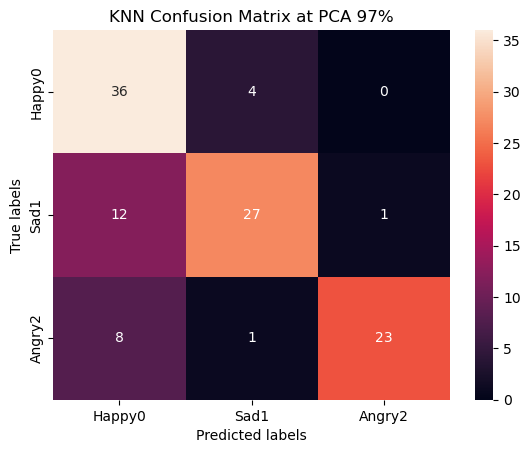

In [3]:
model = KNeighborsClassifier(n_neighbors = 1, p= 2, weights= 'uniform')
model.fit(X_train_97, y_train_97.values.ravel())
y_pred = model.predict(X_test_97)
score = accuracy_score(y_pred,y_test_97)
print("Accuracy:", score)
cm = confusion_matrix(y_test_97.values.ravel(), y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('KNN Confusion Matrix at PCA 97%') 
ax.xaxis.set_ticklabels(['Happy0', 'Sad1' , 'Angry2']); ax.yaxis.set_ticklabels(['Happy0', 'Sad1' , 'Angry2'])

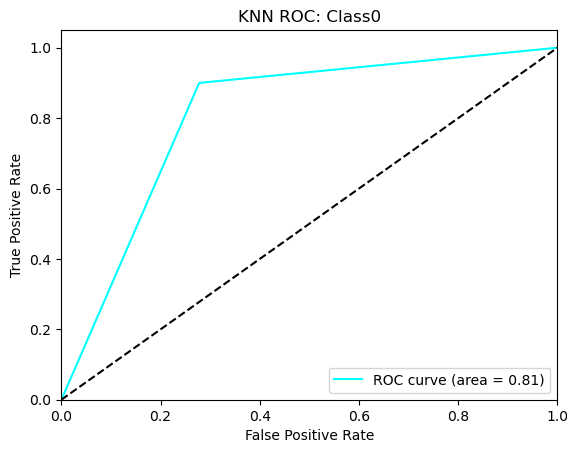

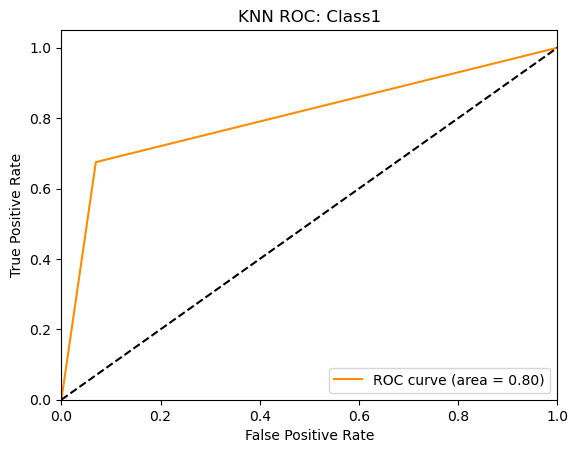

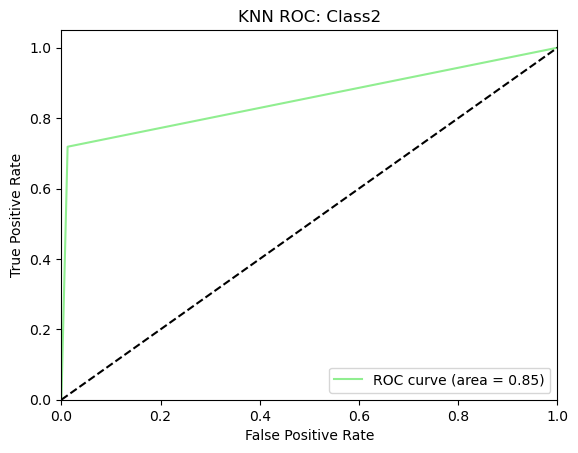

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_train = label_binarize(y_train_97, classes=[0, 1, 2])
y_test = label_binarize(y_test_97, classes=[0, 1, 2])
n_classes = y_train.shape[1]
model = KNeighborsClassifier(n_neighbors = 1, p= 2, weights= 'uniform')
model.fit(X_train_97, y_train_97.values.ravel())
y_score = model.predict_proba(X_test_97)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
colors = cycle(["aqua", "darkorange", "lightgreen"])
for i, color in zip(range(n_classes), colors):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'KNN ROC: Class{i}')
    plt.legend(loc="lower right")
    plt.show()

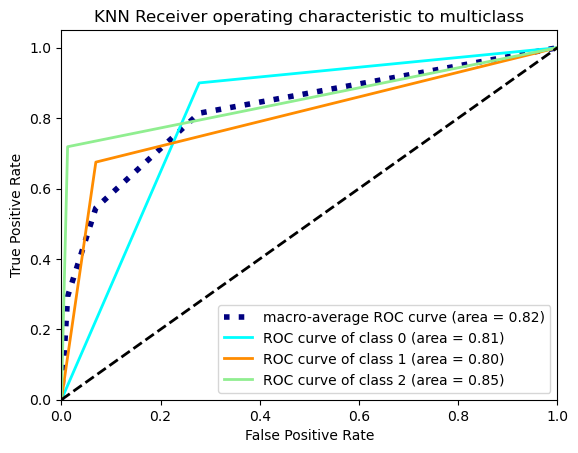

In [11]:
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
""" 
# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
) """

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "lightgreen"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

---------
# SVM

## SVM PCA 97%

In [57]:
svm_clf = SVC()
param_grid = { 'kernel': ['rbf','poly'], 'gamma': [1,0.1,0.01,0.001], 'degree': [3,5],'C':[0.1,1,10,100]}
grid = GridSearchCV(svm_clf, param_grid, cv =5, scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_97, y_train_97.values.ravel())
print(grid.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.8598487993981575


In [58]:
print(grid.best_params_)

{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}


In [59]:
grid_pred = grid.predict(X_test_97)
cm = confusion_matrix(y_test_97.values.ravel(), grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test_97.values.ravel(), grid_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix : 
 [[28 12  0]
 [ 9 31  0]
 [ 0  1 31]]
              precision    recall  f1-score   support

       happy       0.76      0.70      0.73        40
         sad       0.70      0.78      0.74        40
       angry       1.00      0.97      0.98        32

    accuracy                           0.80       112
   macro avg       0.82      0.81      0.82       112
weighted avg       0.81      0.80      0.80       112



In [60]:
result = pd.DataFrame(grid.cv_results_)
result = result.sort_values(by=['mean_test_score'],ascending=False)
result.to_csv('SVM97.csv')

Accuracy: 0.8035714285714286


[Text(0, 0.5, 'Happy0'), Text(0, 1.5, 'Sad1'), Text(0, 2.5, 'Angry2')]

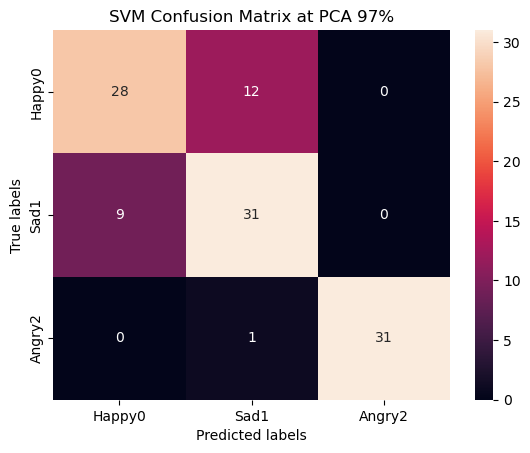

In [4]:
model = SVC(C= 10, gamma= 0.001, kernel= 'rbf')
model.fit(X_train_97, y_train_97.values.ravel())
y_pred = model.predict(X_test_97)
score = accuracy_score(y_pred,y_test_97)
print("Accuracy:", score)
cm = confusion_matrix(y_test_97.values.ravel(), y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('SVM Confusion Matrix at PCA 97%') 
ax.xaxis.set_ticklabels(['Happy0', 'Sad1' , 'Angry2']); ax.yaxis.set_ticklabels(['Happy0', 'Sad1' , 'Angry2'])

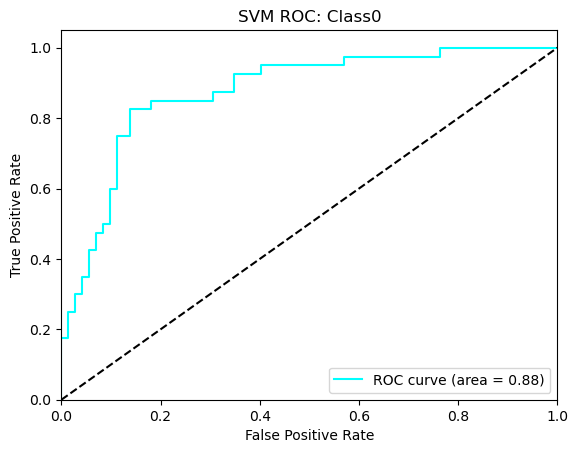

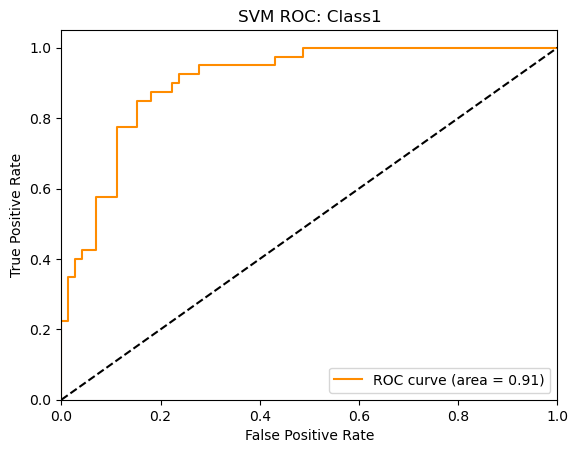

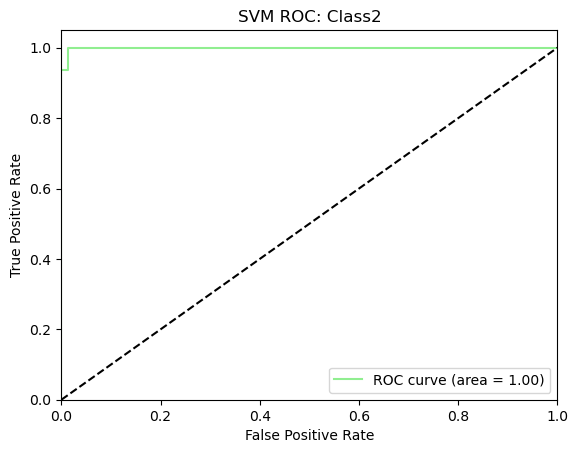

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_train = label_binarize(y_train_97, classes=[0, 1, 2])
y_test = label_binarize(y_test_97, classes=[0, 1, 2])
n_classes = y_train.shape[1]
model = SVC(C= 100, gamma= 'scale', kernel = 'rbf')
y_score = model.fit(X_train_97, y_train_97.values.ravel()).decision_function(X_test_97)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
colors = cycle(["aqua", "darkorange", "lightgreen"])
for i, color in zip(range(n_classes), colors):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'SVM ROC: Class{i}')
    plt.legend(loc="lower right")
    plt.show()

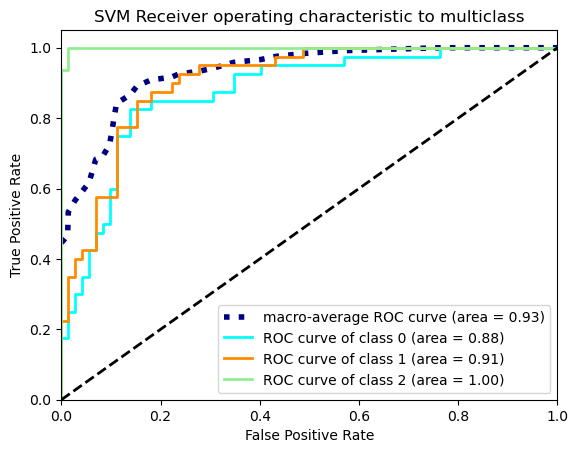

In [13]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

""" # Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
) """

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "lightgreen"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# Bagging SVM

In [13]:
bag_clf = BaggingClassifier(
    SVC(), 
    max_samples=100, bootstrap=True)
param_grid = { 'n_estimators':[100,300,500],'base_estimator__kernel': ['rbf'], 'base_estimator__gamma': [0.001],'base_estimator__C':[10]}
gridb = GridSearchCV(bag_clf, param_grid, cv =5, scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
gridb.fit(X_train_97, y_train_97.values.ravel())
print(gridb.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.7036435316316757


In [21]:
print(gridb.best_score_)

0.7036435316316757


In [14]:
resultb = pd.DataFrame(gridb.cv_results_)
resultb = resultb.sort_values(by=['mean_test_score'],ascending=False)
resultb.to_csv('SVMBag97.csv')

In [15]:
print(gridb.best_params_)

{'base_estimator__C': 10, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'rbf', 'n_estimators': 300}


Accuracy: 0.7410714285714286


[Text(0, 0.5, 'Happy0'), Text(0, 1.5, 'Sad1'), Text(0, 2.5, 'Angry2')]

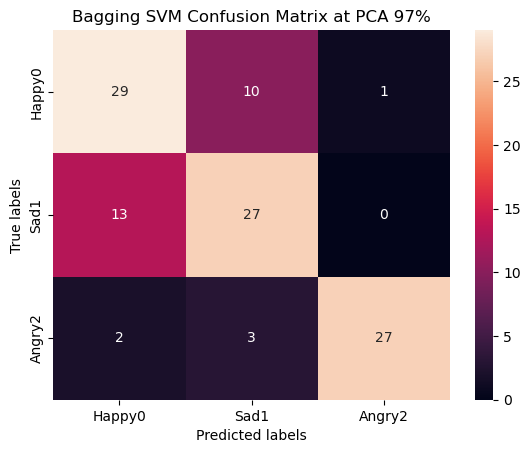

In [6]:
bag_clf = BaggingClassifier(
    SVC(C= 10, gamma= 0.001, kernel= 'rbf'), n_estimators=300,
    max_samples=100, bootstrap=True)
bag_clf.fit(X_train_97, y_train_97.values.ravel())
y_pred = bag_clf.predict(X_test_97)
score = accuracy_score(y_pred,y_test_97)
print("Accuracy:", score)
cm = confusion_matrix(y_test_97.values.ravel(), y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Bagging SVM Confusion Matrix at PCA 97%') 
ax.xaxis.set_ticklabels(['Happy0', 'Sad1' , 'Angry2']); ax.yaxis.set_ticklabels(['Happy0', 'Sad1' , 'Angry2'])

In [5]:
print(classification_report(y_test_97.values.ravel(), y_pred, target_names=['happy', 'sad', 'angry']))

              precision    recall  f1-score   support

       happy       0.62      0.75      0.68        40
         sad       0.74      0.62      0.68        40
       angry       0.93      0.88      0.90        32

    accuracy                           0.74       112
   macro avg       0.76      0.75      0.75       112
weighted avg       0.75      0.74      0.74       112



## ROC AUC

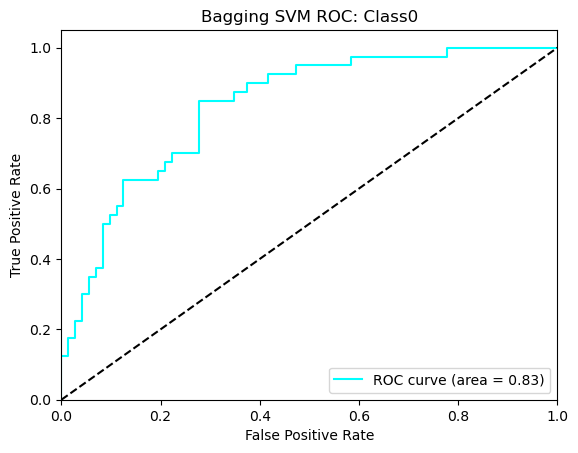

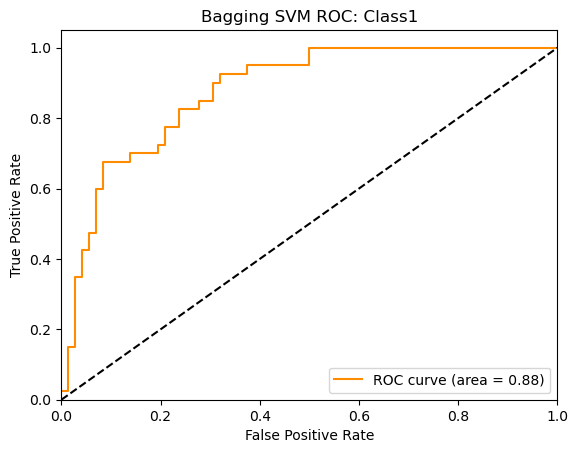

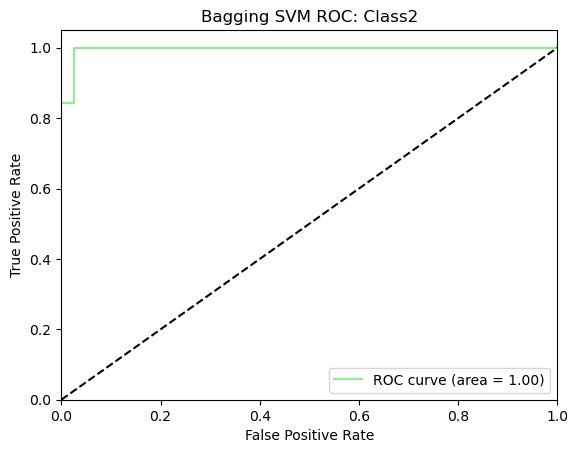

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_train = label_binarize(y_train_97, classes=[0, 1, 2])
y_test = label_binarize(y_test_97, classes=[0, 1, 2])
n_classes = y_train.shape[1]
model = BaggingClassifier(
    SVC(C= 10, gamma= 0.001, kernel= 'rbf'), n_estimators=300,
    max_samples=100, bootstrap=True)
y_score = model.fit(X_train_97, y_train_97.values.ravel()).decision_function(X_test_97)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
colors = cycle(["aqua", "darkorange", "lightgreen"])
for i, color in zip(range(n_classes), colors):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Bagging SVM ROC: Class{i}')
    plt.legend(loc="lower right")
    plt.show()

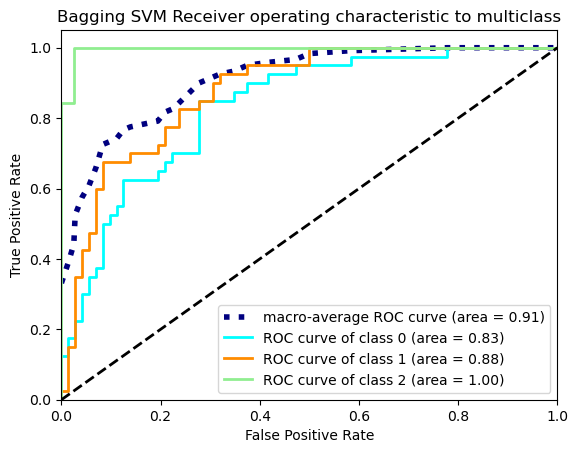

In [15]:
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

""" # Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
 """
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "lightgreen"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bagging SVM Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()